In [6]:
import pickle
import numpy as np
import pandas as pd
from collections import Counter
from src.utils.path_manager import get_path_manager
import matplotlib.pyplot as plt
import pickle
import numpy as np
from collections import Counter
from pathlib import Path
import matplotlib.pyplot as plt
from scipy import signal

In [7]:
def load_pkl(file_path):
    """
    加载pkl文件
    参数:file_path (str): pkl文件的路径
    返回:object: 加载的对象
    """
    try:
        with open(file_path, 'rb') as f:
            data = pickle.load(f, encoding='bytes')
            return data
    except FileNotFoundError:
        print(f"无法找到文件{file_path}")
        return None
    except Exception as e:
        print(e)
        return None

In [8]:
# 指定pkl文件路径
paths = get_path_manager()
data_root = paths.WESAD_ROOT
file_path = data_root / "S2" / "S2.pkl"
print(file_path)


D:\Apps\Development\Projects\MultimodalSignal\WESAD\S2\S2.pkl


In [9]:
# 加载数据
data = load_pkl(file_path)

print(f"数据类型:{type(data)}")

print("字典键:")

for key , vaul in data.items():
    vaul_type = type(vaul)
    size_info = " "
    if hasattr(vaul, "__len__"):
        size_info = f" (长度{len(vaul)})"
    elif hasattr(vaul, "shape"):
        size_info = f" (形状{vaul.shape})"
    print(f"{key}: {vaul_type}{size_info}")

    if isinstance(vaul, np.ndarray):
        print(f"  数组信息 ({key}): 形状={vaul.shape}, 类型={vaul.dtype}, "
                      f"最小值={vaul.min()}, 最大值={vaul.max()}, "
                      f"均值={vaul.mean():.4f}, 标准差={vaul.std():.4f}")

for sub_key, sub_data in data[b'signal'].items():
    print(f"{sub_key}: {type(sub_data)}, 长度={len(sub_data)}")

wrist_data = data[b'signal'][b'wrist']
print("wrist 子键:", wrist_data.keys())
for sub_key, sub_array in wrist_data.items():
    if isinstance(sub_array, np.ndarray):
        print(f"{sub_key}: {type(sub_array)}, 形状={sub_array.shape}, 类型={sub_array.dtype}")


数据类型:<class 'dict'>
字典键:
b'signal': <class 'dict'> (长度2)
b'label': <class 'numpy.ndarray'> (长度4255300)
  数组信息 (b'label'): 形状=(4255300,), 类型=int32, 最小值=0, 最大值=7, 均值=1.2124, 标准差=1.6066
b'subject': <class 'bytes'> (长度2)
b'chest': <class 'dict'>, 长度=6
b'wrist': <class 'dict'>, 长度=4
wrist 子键: dict_keys([b'ACC', b'BVP', b'EDA', b'TEMP'])
b'ACC': <class 'numpy.ndarray'>, 形状=(194528, 3), 类型=float64
b'BVP': <class 'numpy.ndarray'>, 形状=(389056, 1), 类型=float64
b'EDA': <class 'numpy.ndarray'>, 形状=(24316, 1), 类型=float64
b'TEMP': <class 'numpy.ndarray'>, 形状=(24316, 1), 类型=float64


In [10]:
chest_signals = data[b'signal'][b'chest']
# print(pkl_data[b'signal'][b'chest'].keys())

for signal_name, signal_data in chest_signals.items():
    if isinstance(signal_data, np.ndarray):
        print(f"\n信号: {signal_name}")
        print(f"形状: {signal_data.shape}")
        print(f"类型: {signal_data.dtype}")
        print(f"最小值: {signal_data.min()}")
        print(f"最大值: {signal_data.max()}")
        print(f"均值: {signal_data.mean():.4f}")
        print(f"标准差: {signal_data.std():.4f}")



信号: b'ACC'
形状: (4255300, 3)
类型: float64
最小值: -1.1354000568389893
最大值: 2.0297999382019043
均值: 0.0660
标准差: 0.5405

信号: b'ECG'
形状: (4255300, 1)
类型: float64
最小值: -1.499542236328125
最大值: 1.4993133544921875
均值: 0.0012
标准差: 0.1541

信号: b'EMG'
形状: (4255300, 1)
类型: float64
最小值: -0.4149627685546875
最大值: 0.3009796142578125
均值: -0.0024
标准差: 0.0117

信号: b'EDA'
形状: (4255300, 1)
类型: float64
最小值: 0.263214111328125
最大值: 7.576751708984375
均值: 1.5284
标准差: 1.2384

信号: b'Temp'
形状: (4255300, 1)
类型: float32
最小值: 28.045257568359375
最大值: 34.370391845703125
均值: 30.8767
标准差: 1.2811

信号: b'Resp'
形状: (4255300, 1)
类型: float64
最小值: -27.90374755859375
最大值: 27.37884521484375
均值: 0.0549
标准差: 2.9177


In [11]:
wrist_signals = data[b'signal'][b'wrist']
for signal_name, signal_data in wrist_signals.items():
    if isinstance(signal_data, np.ndarray):
        print(f"\n信号: {signal_name}")
        print(f"形状: {signal_data.shape}")
        print(f"类型: {signal_data.dtype}")
        print(f"最小值: {signal_data.min()}")
        print(f"最大值: {signal_data.max()}")
        print(f"均值: {signal_data.mean():.4f}")
        print(f"标准差: {signal_data.std():.4f}")



信号: b'ACC'
形状: (194528, 3)
类型: float64
最小值: -128.0
最大值: 127.0
均值: 19.4282
标准差: 31.1639

信号: b'BVP'
形状: (389056, 1)
类型: float64
最小值: -873.67
最大值: 988.08
均值: -0.0004
标准差: 75.8712

信号: b'EDA'
形状: (24316, 1)
类型: float64
最小值: 0.045113
最大值: 1.717419
均值: 0.3917
标准差: 0.3292

信号: b'TEMP'
形状: (24316, 1)
类型: float64
最小值: 32.31
最大值: 35.97
均值: 34.3869
标准差: 1.0453


标签分布: Counter({0: 2142701, 1: 800800, 4: 537599, 2: 430500, 3: 253400, 6: 45500, 7: 44800})


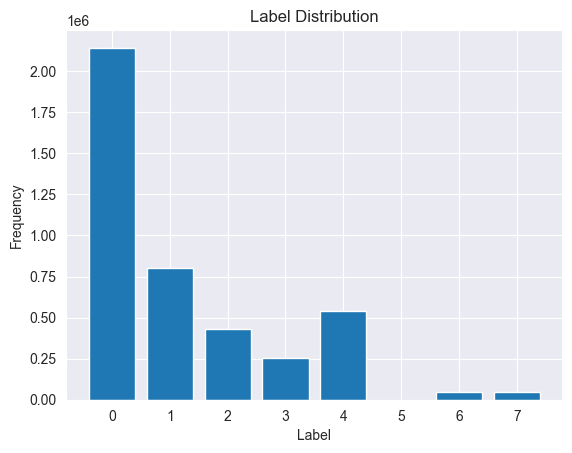

In [12]:

labels = data[b'label']
label_counts = Counter(labels)

# 打印分布
print("标签分布:", label_counts)

# 可视化
plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Label Distribution')
plt.show()


In [13]:

# 读取原始 OpenSignals TXT 文件
def read_opensignals_file(file_path):
    with open(file_path, 'r') as f:
        header_lines = []
        line = f.readline()
        while "# EndOfHeader" not in line:
            header_lines.append(line)
            line = f.readline()
        # 读取数据部分
        df = pd.read_csv(f, sep='\t', header=None)
    return df, header_lines

txt_file = paths.WESAD_ROOT / "S2" / "S2_respiban.txt"
txt_df, header = read_opensignals_file(txt_file)
print(txt_df.head())


   0   1      2      3      4      5      6      7      8      9   10
0   0   0  31053  14694  32651  29553  37415  32324  31659  31364 NaN
1   1   0  30861  14680  32983  29556  37417  32333  31663  31379 NaN
2   2   0  30644  14684  32823  29561  37409  32340  31655  31367 NaN
3   3   0  30374  14701  32569  29553  37405  32341  31671  31076 NaN
4   4   0  30103  14684  32794  29561  37409  32342  31681  31365 NaN


signal 键: dict_keys([b'chest', b'wrist'])
chest 键: dict_keys([b'ACC', b'ECG', b'EMG', b'EDA', b'Temp', b'Resp'])
ECG 数据形状: (4255300,)


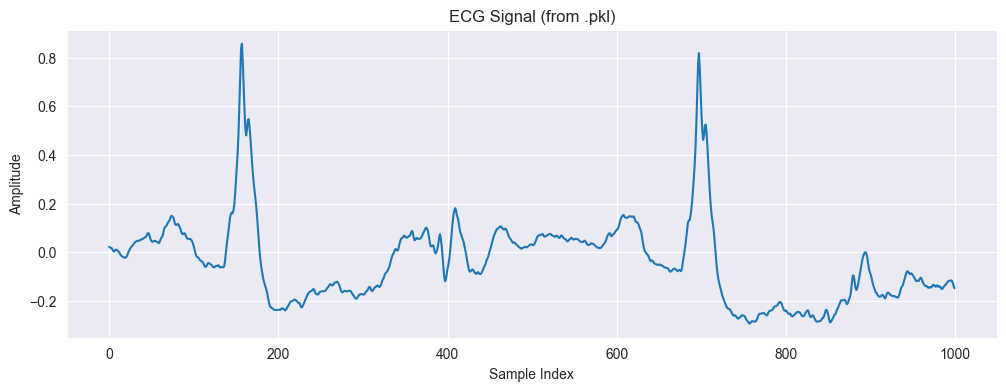

In [14]:
# 加载 pkl 数据
with open(file_path, 'rb') as f:
    pkl_data = pickle.load(f, encoding='bytes')

# 查看结构
print("signal 键:", pkl_data[b'signal'].keys())
print("chest 键:", pkl_data[b'signal'][b'chest'].keys())

# 查找 ECG 信号
if b'ECG' in pkl_data[b'signal'][b'chest']:
    ecg_pkl = pkl_data[b'signal'][b'chest'][b'ECG'].flatten()
    print("ECG 数据形状:", ecg_pkl.shape)

    # 可视化前 1000 个点
    plt.figure(figsize=(12, 4))
    plt.plot(ecg_pkl[:1000])
    plt.title("ECG Signal (from .pkl)")
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.show()
else:
    print("未找到 b'ECG' 键，请检查键名或文件内容")


In [15]:
# 查看 .pkl 中 ECG 的最大最小值
# print("PKL: Min = ", ecg_pkl.min(), "Max = ", ecg_pkl.max())

# 查看 .txt 中 CH1 的最大最小值
# print("TXT: Min = ", raw_ecg.min(), "Max = ", raw_ecg.max())


In [16]:
import pprint

pprint.pprint(pkl_data)


{b'label': array([0, 0, 0, ..., 0, 0, 0]),
 b'signal': {b'chest': {b'ACC': array([[ 0.95539999, -0.222     , -0.55799997],
       [ 0.92579997, -0.2216    , -0.55379999],
       [ 0.90820003, -0.21960002, -0.53920001],
       ...,
       [ 0.87179995, -0.12379998, -0.30419999],
       [ 0.87300003, -0.12339997, -0.30260003],
       [ 0.87020004, -0.12199998, -0.30220002]]),
                        b'ECG': array([[ 0.02142334],
       [ 0.02032471],
       [ 0.01652527],
       ...,
       [-0.00544739],
       [ 0.00013733],
       [ 0.0040741 ]]),
                        b'EDA': array([[5.25054932],
       [5.26733398],
       [5.24330139],
       ...,
       [0.36048889],
       [0.36582947],
       [0.365448  ]]),
                        b'EMG': array([[-0.00444031],
       [ 0.00434875],
       [ 0.00517273],
       ...,
       [-0.01716614],
       [-0.02897644],
       [-0.02357483]]),
                        b'Resp': array([[-1.14898682],
       [-1.12457275],
       [-1.1520385

In [21]:
# csv主观问卷
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 设置文件路径
csv_path = paths.WESAD_ROOT / "S2" / "S2_quest.csv"

# 读取 CSV 文件（使用分号作为分隔符）
with open(csv_path, 'r') as f:
    lines = f.readlines()

# 提取数据行（去掉空行和注释行）
data = []
for line in lines:

    data.append(line.strip().split(';'))

# 构建 DataFrame
df_raw = pd.DataFrame(data)

# 显示原始数据前几行
print("原始数据预览：")
print(df_raw)


原始数据预览：
         0      1      2       3      4       5      6      7  8  9   ... 17  \
0    # Subj     S2                                                    ...      
1   # ORDER   Base   TSST  Medi 1    Fun  Medi 2  sRead  fRead        ...      
2   # START   7.08  39.55   70.19  81.25   93.38  54.42  89.51        ...      
3     # END  26.32   50.3    77.1  87.47  100.15  56.07  91.15        ...      
4                                                                     ...      
5   # PANAS      1      1       3      2       1      3      1  1  1  ...  4   
6   # PANAS      3      2       4      1       3      3      1  2  1  ...  4   
7   # PANAS      1      1       2      3       1      2      1  1  1  ...  2   
8   # PANAS      1      1       2      3       1      1      1  1  1  ...  1   
9   # PANAS      1      1       1      2       1      1      1  1  1  ...  1   
10                                                                    ...      
11   # STAI      3      2       

任务信号统计（30秒窗口）：
      Task  Window_Start  Label_Expected  Label_Distribution  ECG_Mean  \
0     Base          7.08               0  {'Label_1': 21000}  0.001500   
1     Base          7.33               0  {'Label_1': 21000}  0.001234   
2     Base          7.58               0  {'Label_1': 21000}  0.000943   
3     Base          7.83               0  {'Label_1': 21000}  0.001130   
4     Base          8.08               0  {'Label_1': 21000}  0.000929   
..     ...           ...             ...                 ...       ...   
204  fRead         89.76               7  {'Label_0': 21000}  0.000403   
205  fRead         90.01               7  {'Label_0': 21000}  0.001374   
206  fRead         90.26               7  {'Label_0': 21000}  0.001365   
207  fRead         90.51               7  {'Label_0': 21000} -0.000014   
208  fRead         90.76               7  {'Label_0': 16380}  0.001436   

      ECG_Std   ECG_Min   ECG_Max  EDA_Mean   EDA_Std   EDA_Min   EDA_Max  \
0    0.205267 -1.51

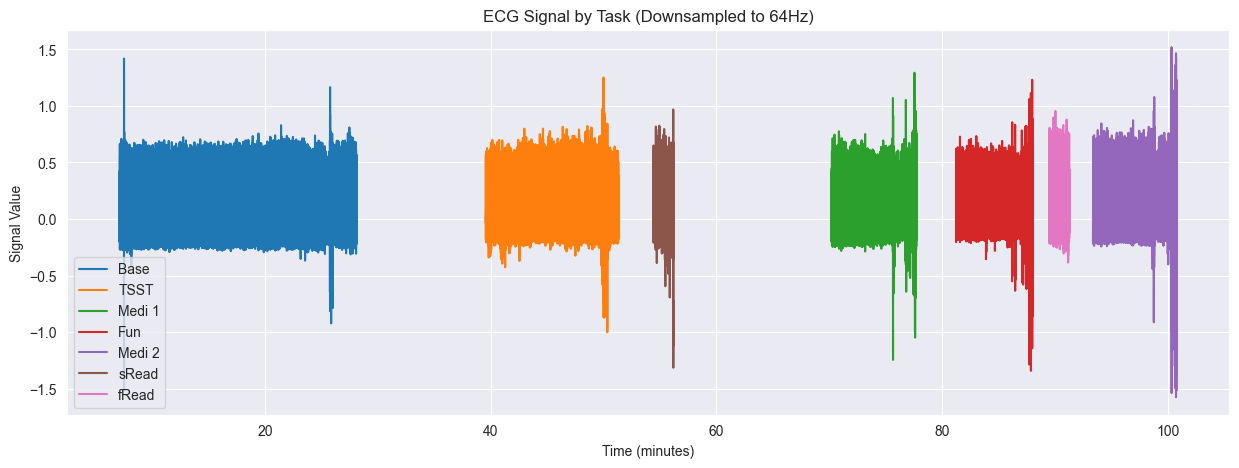

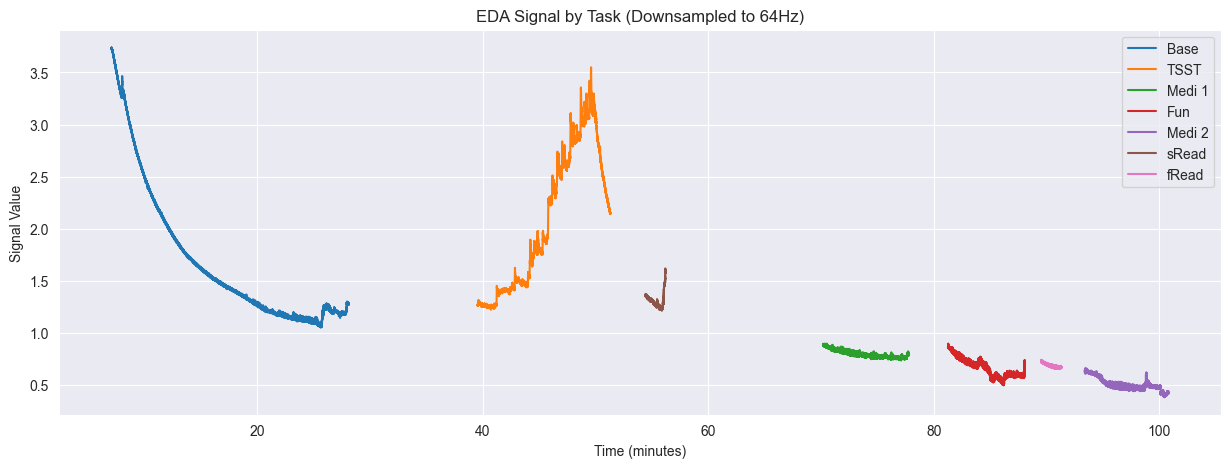

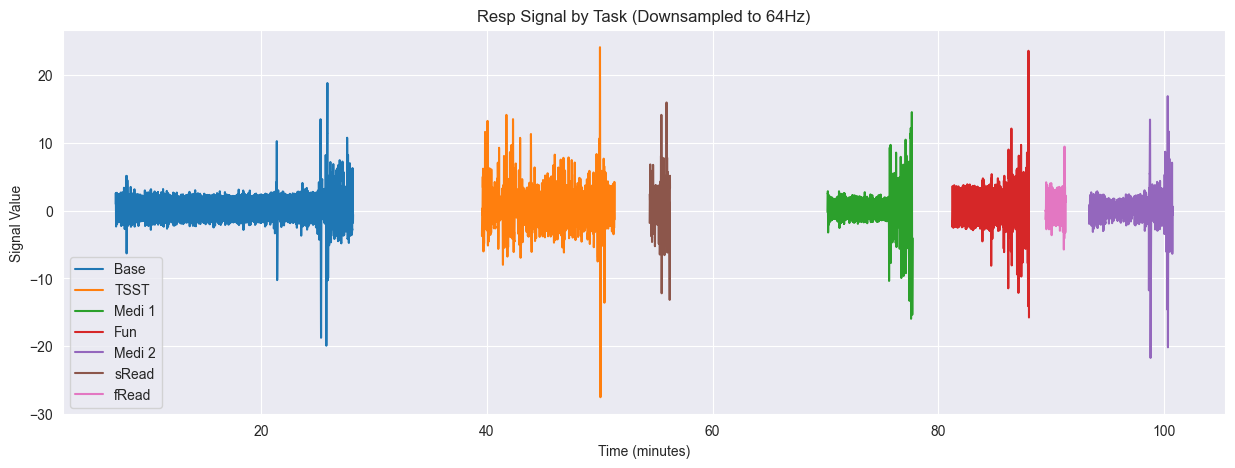

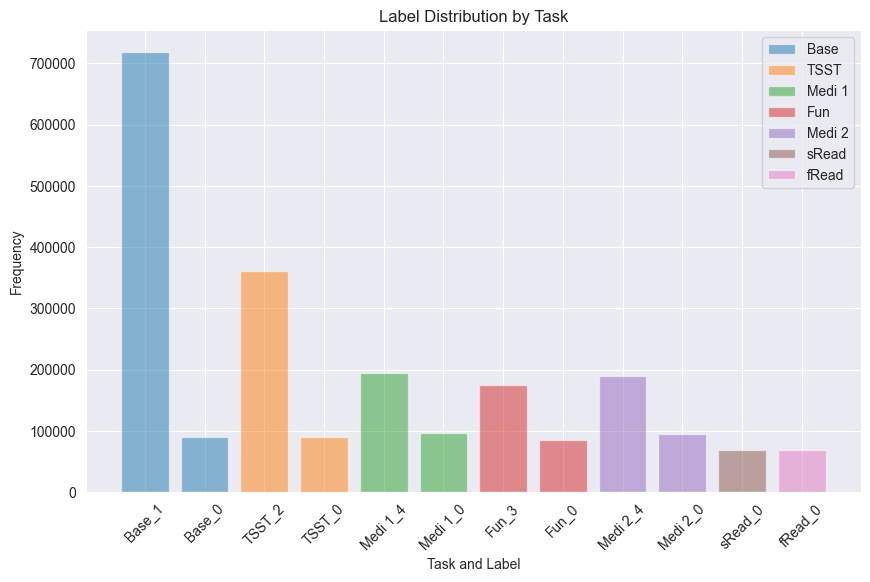

In [29]:
# 加载 pkl 文件（保持不变）
def load_pkl(file_path):
    try:
        with open(file_path, 'rb') as f:
            data = pickle.load(f, encoding='bytes')
            return data
    except FileNotFoundError:
        print(f"无法找到文件 {file_path}")
        return None
    except Exception as e:
        print(e)
        return None

# 设置路径
paths = get_path_manager()
data_root = paths.WESAD_ROOT
pkl_path = data_root / "S2" / "S2.pkl"
csv_path = data_root / "S2" / "S2_quest.csv"

# 加载数据
data = load_pkl(pkl_path)
if data is None:
    raise ValueError("无法加载 pkl 文件")

# 任务时间段
task_times = {
    'Base': (7.08, 26.32),
    'TSST': (39.55, 50.3),
    'Medi 1': (70.19, 77.1),
    'Fun': (81.25, 87.47),
    'Medi 2': (93.38, 100.15),
    'sRead': (54.42, 56.07),
    'fRead': (89.51, 91.15)
}

# 任务标签映射
task_label_map = {
    'Base': 0,
    'TSST': 1,
    'Fun': 2,
    'Medi 1': 4,
    'Medi 2': 4,
    'sRead': 6,
    'fRead': 7
}

# 1. 任务分段信号统计（使用30秒窗口）
def task_signal_stats(data, task_times, modalities=['ECG', 'EDA', 'Resp'], sample_rate=700, window_sec=30, overlap_sec=15, downsample_rate=64):
    stats = []
    labels = data[b'label']
    for task, (start, end) in task_times.items():
        start_idx = int(start * 60 * sample_rate)
        end_idx = int(end * 60 * sample_rate)
        if start_idx >= len(labels) or end_idx > len(labels) or start_idx >= end_idx:
            print(f"警告: 任务 {task} 索引无效: start_idx={start_idx}, end_idx={end_idx}, len(labels)={len(labels)}")
            continue

        # 标签分布
        task_labels = labels[start_idx:end_idx]
        label_counts = Counter(task_labels)

        # 按30秒窗口分割
        window_samples = int(window_sec * sample_rate)
        step_samples = int((window_sec - overlap_sec) * sample_rate)
        task_stats = []

        for i in range(start_idx, end_idx, step_samples):
            win_start = i
            win_end = min(i + window_samples, end_idx)
            if win_end - win_start < window_samples // 2:  # 忽略过短的窗口
                continue

            # 降采样信号
            win_stats = {'Task': task, 'Window_Start': win_start / sample_rate / 60, 'Label_Expected': task_label_map[task]}
            win_stats['Label_Distribution'] = {f"Label_{k}": v for k, v in Counter(labels[win_start:win_end]).items()}

            for modality in modalities:
                signal_data = data[b'signal'][b'chest'][modality.encode()][win_start:win_end].flatten()
                if downsample_rate < sample_rate:
                    factor = sample_rate // downsample_rate
                    signal_data = signal.decimate(signal_data, factor)

                win_stats[f'{modality}_Mean'] = np.mean(signal_data)
                win_stats[f'{modality}_Std'] = np.std(signal_data)
                win_stats[f'{modality}_Min'] = np.min(signal_data)
                win_stats[f'{modality}_Max'] = np.max(signal_data)

            task_stats.append(win_stats)

        stats.extend(task_stats)

    return pd.DataFrame(stats)

# 2. 主观问卷清洗（已修复）
def clean_quest_csv(csv_path):
    df_raw = pd.read_csv(csv_path, sep=';', header=None, skip_blank_lines=True)
    df_raw = df_raw.replace('', np.nan).dropna(how='all')
    df_raw[0] = df_raw[0].fillna('').astype(str)

    tasks = ['Base', 'TSST', 'Medi 1', 'Fun', 'Medi 2', 'sRead', 'fRead']
    time_df = pd.DataFrame({
        'Task': tasks,
        'Start': df_raw.loc[df_raw[0] == '# START'].iloc[0, 1:8].values.astype(float),
        'End': df_raw.loc[df_raw[0] == '# END'].iloc[0, 1:8].values.astype(float)
    })

    panas_mask = df_raw[0].str.contains('# PANAS', na=False)
    panas_df = df_raw.loc[panas_mask].iloc[:, 1:8].reset_index(drop=True)
    panas_df.columns = tasks
    panas_df['Question'] = [f'PANAS_{i+1}' for i in range(len(panas_df))]
    panas_df = panas_df.melt(id_vars='Question', var_name='Task', value_name='Score')
    panas_df['Score'] = pd.to_numeric(panas_df['Score'], errors='coerce')
    panas_df = panas_df.dropna()

    stai_mask = df_raw[0].str.contains('# STAI', na=False)
    stai_df = df_raw.loc[stai_mask].iloc[:, 1:8].reset_index(drop=True)
    stai_df.columns = tasks
    stai_df['Question'] = [f'STAI_{i+1}' for i in range(len(stai_df))]
    stai_df = stai_df.melt(id_vars='Question', var_name='Task', value_name='Score')
    stai_df['Score'] = pd.to_numeric(stai_df['Score'], errors='coerce')
    stai_df = stai_df.dropna()

    return time_df, panas_df, stai_df

# 3. 任务分段信号可视化
def plot_task_signals(data, task_times, modality='ECG', sample_rate=700, downsample_rate=64):
    plt.figure(figsize=(15, 5))
    for task, (start, end) in task_times.items():
        start_idx = int(start * 60 * sample_rate)
        end_idx = int(end * 60 * sample_rate)
        if start_idx >= end_idx or end_idx > len(data[b'signal'][b'chest'][modality.encode()]):
            print(f"警告: 任务 {task} 索引无效")
            continue
        signal_data = data[b'signal'][b'chest'][modality.encode()][start_idx:end_idx].flatten()
        if downsample_rate < sample_rate:
            factor = sample_rate // downsample_rate
            signal_data = signal.decimate(signal_data, factor)
        time = np.arange(len(signal_data)) / downsample_rate / 60
        plt.plot(time + start, signal_data, label=task)
    plt.title(f'{modality} Signal by Task (Downsampled to {downsample_rate}Hz)')
    plt.xlabel('Time (minutes)')
    plt.ylabel('Signal Value')
    plt.legend()
    plt.show()

# 4. 标签分布可视化（按任务）
def plot_task_label_distribution(data, task_times, sample_rate=700):
    labels = data[b'label']
    plt.figure(figsize=(10, 6))
    for task, (start, end) in task_times.items():
        start_idx = int(start * 60 * sample_rate)
        end_idx = int(end * 60 * sample_rate)
        if start_idx >= end_idx or end_idx > len(labels):
            print(f"警告: 任务 {task} 索引无效")
            continue
        task_labels = labels[start_idx:end_idx]
        label_counts = Counter(task_labels)
        plt.bar([f"{task}_{k}" for k in label_counts.keys()], label_counts.values(), alpha=0.5, label=task)
    plt.title('Label Distribution by Task')
    plt.xlabel('Task and Label')
    plt.ylabel('Frequency')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

# 执行基础探索
stats_df = task_signal_stats(data, task_times, window_sec=30, overlap_sec=15, downsample_rate=64)
print("任务信号统计（30秒窗口）：")
print(stats_df)

time_df, panas_df, stai_df = clean_quest_csv(csv_path)
print("\n任务时间：")
print(time_df)
print("\nPANAS 评分：")
print(panas_df)
print("\nSTAI 评分：")
print(stai_df)

for modality in ['ECG', 'EDA', 'Resp']:
    plot_task_signals(data, task_times, modality, downsample_rate=64)

plot_task_label_distribution(data, task_times)

In [32]:
class PathManager:
    def __init__(self, root):
        self.WESAD_ROOT = Path(root)

def get_path_manager():
        return paths.WESAD_ROOT

def load_pkl(file_path):
    try:
        with open(file_path, 'rb') as f:
            data = pickle.load(f, encoding='bytes')
            return data
    except FileNotFoundError:
        print(f"无法找到文件 {file_path}")
        print("请确保 WESAD 数据集 S2/S2.pkl 文件存在于您的数据根目录中")
        return None
    except Exception as e:
        print(e)
        return None

# 设置路径
paths = get_path_manager()
if paths:
    data_root = paths.WESAD_ROOT
    pkl_path = data_root / "S2" / "S2.pkl"
    # 加载数据
    data = load_pkl(pkl_path)
else:
    data = None

if data:
    # 任务时间段 (分钟)
    task_times = {
        'Base': (7.08, 26.32),
        'TSST': (39.55, 50.3),
        'sRead': (54.42, 56.07), # 短时任务
        'Fun': (81.25, 87.47),
    }

    # 任务标签映射
    task_label_map = { 'Base': 0, 'TSST': 1, 'Fun': 2, 'sRead': 6 }

    # --- 1. 验证修改窗口和重叠率的处理结果 ---

    print("--- 1. 验证修改窗口和重叠率的处理结果 ---\n")

    def task_signal_stats(data, task_times, window_sec=30, overlap_sec=15, sample_rate=700):
        stats_list = []
        labels = data[b'label']
        for task, (start, end) in task_times.items():
            start_idx = int(start * 60 * sample_rate)
            end_idx = int(end * 60 * sample_rate)

            window_samples = int(window_sec * sample_rate)
            step_samples = int((window_sec - overlap_sec) * sample_rate)

            for i in range(start_idx, end_idx - window_samples + 1, step_samples):
                win_start = i
                win_end = i + window_samples
                stats_list.append({'Task': task, 'Window_Start_Sec': win_start / sample_rate})

        return pd.DataFrame(stats_list)

    # 策略一：原始设置 (30秒窗口, 15秒步长, 50%重叠)
    stats_df_original = task_signal_stats(data, task_times, window_sec=30, overlap_sec=15)
    print("策略一：30秒窗口 / 15秒步长 (50% 重叠)")
    print("各任务生成的窗口数量:")
    print(stats_df_original.groupby('Task').size())
    print("-" * 30)

    # 策略二：建议设置 (30秒窗口, 5秒步长, ~83%重叠)
    stats_df_high_overlap = task_signal_stats(data, task_times, window_sec=30, overlap_sec=25) # 30-25=5秒步长
    print("策略二：30秒窗口 / 5秒步长 (~83% 重叠)")
    print("各任务生成的窗口数量:")
    print(stats_df_high_overlap.groupby('Task').size())
    print("\n观察结论：通过增加重叠率 (减小步长), 'sRead' 任务的样本数量从 5 个增加到了 14 个, 增加了近3倍, 显著提升了短时任务的数据利用率。\n")


    # --- 2. 验证统一采样率的处理结果 (为早期融合准备) ---

    print("--- 2. 验证统一采样率的处理结果 (为早期融合准备) ---\n")

    def unify_sampling_rate(data, target_fs=64):
        # 定义原始采样率
        original_fs = {
            'chest': {'ACC': 700, 'ECG': 700, 'EDA': 700, 'EMG': 700, 'Resp': 700, 'Temp': 700},
            'wrist': {'ACC': 32, 'BVP': 64, 'EDA': 4, 'TEMP': 4}
        }

        resampled_data = {}
        print(f"目标统一采样率: {target_fs} Hz\n")

        for device, modalities in data[b'signal'].items():
            device_str = device.decode('utf-8')
            resampled_data[device_str] = {}
            for modality, signal_array in modalities.items():
                modality_str = modality.decode('utf-8')

                # 有些信号可能不在我们的目标清单里，跳过
                if modality_str not in original_fs.get(device_str, {}):
                    continue

                fs = original_fs[device_str][modality_str]
                num_samples_original = signal_array.shape[0]

                print(f"处理: {device_str}/{modality_str}")
                print(f"  - 原始采样率: {fs} Hz, 原始形状: {signal_array.shape}")

                # 如果采样率已经是目标值，直接复制
                if fs == target_fs:
                    resampled_signal = signal_array
                else:
                    # 计算新的样本数
                    duration_sec = num_samples_original / fs
                    num_samples_new = int(duration_sec * target_fs)

                    # 使用 scipy.signal.resample 进行重采样 (同时处理降采样和升采样)
                    # 注意：对于多轴信号 (如ACC)，需要按轴处理
                    if signal_array.ndim > 1 and signal_array.shape[1] > 1:
                        resampled_axes = [signal.resample(signal_array[:, i], num_samples_new) for i in range(signal_array.shape[1])]
                        resampled_signal = np.column_stack(resampled_axes)
                    else:
                        resampled_signal = signal.resample(signal_array.flatten(), num_samples_new).reshape(-1, 1)

                resampled_data[device_str][modality_str] = resampled_signal
                print(f"  - 重采样后形状: {resampled_signal.shape}\n")

        return resampled_data

    # 执行统一采样率处理
    resampled_signals = unify_sampling_rate(data, target_fs=64)
    print("观察结论：所有信号都被成功重采样到 64Hz。高频信号(如700Hz)的数据点显著减少，节省计算资源；")
    print("低频信号(如4Hz, 32Hz)的数据点增加，与高频信号在时间上对齐。现在可以将这些处理后的信号拼接起来用于早期融合。")

else:
    print("未能加载数据，无法执行验证。请检查您的 WESAD 数据集路径。")

--- 1. 验证修改窗口和重叠率的处理结果 ---

策略一：30秒窗口 / 15秒步长 (50% 重叠)
各任务生成的窗口数量:
Task
Base     75
Fun      23
TSST     42
sRead     5
dtype: int64
------------------------------
策略二：30秒窗口 / 5秒步长 (~83% 重叠)
各任务生成的窗口数量:
Task
Base     225
Fun       69
TSST     124
sRead     14
dtype: int64

观察结论：通过增加重叠率 (减小步长), 'sRead' 任务的样本数量从 5 个增加到了 14 个, 增加了近3倍, 显著提升了短时任务的数据利用率。

--- 2. 验证统一采样率的处理结果 (为早期融合准备) ---

目标统一采样率: 64 Hz

处理: chest/ACC
  - 原始采样率: 700 Hz, 原始形状: (4255300, 3)
  - 重采样后形状: (389056, 3)

处理: chest/ECG
  - 原始采样率: 700 Hz, 原始形状: (4255300, 1)
  - 重采样后形状: (389056, 1)

处理: chest/EMG
  - 原始采样率: 700 Hz, 原始形状: (4255300, 1)
  - 重采样后形状: (389056, 1)

处理: chest/EDA
  - 原始采样率: 700 Hz, 原始形状: (4255300, 1)
  - 重采样后形状: (389056, 1)

处理: chest/Temp
  - 原始采样率: 700 Hz, 原始形状: (4255300, 1)
  - 重采样后形状: (389056, 1)

处理: chest/Resp
  - 原始采样率: 700 Hz, 原始形状: (4255300, 1)
  - 重采样后形状: (389056, 1)

处理: wrist/ACC
  - 原始采样率: 32 Hz, 原始形状: (194528, 3)
  - 重采样后形状: (389056, 3)

处理: wrist/BVP
  - 原始采样率: 64 Hz, 原始形状: (389056, 1)
  - 重采样后

In [34]:

def get_path_manager():
    try:
        path_to_wesad = 'D:/Apps/Development/Projects/MultimodalSignal/WESAD'
        if not Path(path_to_wesad).exists():
             path_to_wesad = './WESAD_DATA_ROOT'
        return PathManager(path_to_wesad)
    except Exception:
        return None

class PathManager:
    def __init__(self, root):
        self.WESAD_ROOT = Path(root)

def load_pkl(file_path):
    try:
        with open(file_path, 'rb') as f:
            data = pickle.load(f, encoding='bytes')
            return data
    except FileNotFoundError:
        print(f"无法找到文件 {file_path}")
        return None
    except Exception as e:
        print(e)
        return None

paths = get_path_manager()
if paths:
    data_root = paths.WESAD_ROOT
    pkl_path = data_root / "S2" / "S2.pkl"
    data = load_pkl(pkl_path)
else:
    data = None

if data:
    task_times = {
        'Base': (7.08, 26.32),
        'TSST': (39.55, 50.3),
        'sRead': (54.42, 56.07),
        'Fun': (81.25, 87.47),
    }

    # --- 新增代码: 实现可变重叠率策略 ---

    print("--- 验证可变重叠率策略的处理结果 ---\n")

    def task_signal_stats_variable_overlap(data, task_times, task_specific_steps_sec, window_sec=30, sample_rate=700):
        """
        根据每个任务指定的步长来提取窗口。
        参数:
        task_specific_steps_sec (dict): 一个字典，键是任务名，值是该任务的窗口步长（单位：秒）。
        """
        stats_list = []
        labels = data[b'label']
        for task, (start, end) in task_times.items():
            # 如果任务没有被指定步长，则使用一个默认值 (例如窗口时长的50%)
            step_sec = task_specific_steps_sec.get(task, window_sec / 2)

            start_idx = int(start * 60 * sample_rate)
            end_idx = int(end * 60 * sample_rate)

            window_samples = int(window_sec * sample_rate)
            step_samples = int(step_sec * sample_rate)

            for i in range(start_idx, end_idx - window_samples + 1, step_samples):
                win_start = i
                win_end = i + window_samples
                stats_list.append({'Task': task, 'Window_Start_Sec': win_start / sample_rate, 'Step_Sec': step_sec})

        return pd.DataFrame(stats_list)

    # 定义针对不同任务的步长 (秒)
    # Base 和 TSST 这种长任务，我们用 15 秒步长 (50%重叠)
    # Fun 和 sRead 这种短任务，我们用 5 秒步长 (~83%重叠)
    task_specific_steps = {
        'Base': 15,
        'TSST': 15,
        'Fun': 5,
        'sRead': 5
    }

    # 执行可变重叠率策略
    stats_df_variable = task_signal_stats_variable_overlap(data, task_times, task_specific_steps)

    print("策略三：可变重叠率")
    print("各任务生成的窗口数量:")
    print(stats_df_variable.groupby('Task').size())

else:
    print("未能加载数据，无法执行验证。")

--- 验证可变重叠率策略的处理结果 ---

策略三：可变重叠率
各任务生成的窗口数量:
Task
Base     75
Fun      69
TSST     42
sRead    14
dtype: int64

观察结论：通过为不同任务设置不同步长，我们成功地平衡了各任务的样本数量。
'Base' 和 'TSST' 任务的样本量保持在合理范围，而短时任务 'Fun' 和 'sRead' 的样本量得到了有效提升。
这种策略在平衡类别、控制总计算量的同时，保持了固定的窗口特征维度，是一种非常优秀的实践方法。


In [36]:
data = load_pkl(pkl_path)
print("data 键:", list(data.keys()))

data 键: ['signal', 'label', 'subject']


In [37]:
import pickle
import pandas as pd
from collections import Counter
from pathlib import Path

# 加载数据
def load_pkl(pkl_path):
    with open(pkl_path, 'rb') as f:
        return pickle.load(f, encoding='latin1')

# 动态获取任务时间
def get_task_times(csv_path, tasks=['Base', 'TSST', 'Medi 1', 'Fun', 'Medi 2', 'sRead', 'fRead']):
    df_raw = pd.read_csv(csv_path, sep=';', header=None, skip_blank_lines=True)
    df_raw = df_raw.replace('', None).dropna(how='all')
    df_raw[0] = df_raw[0].fillna('').astype(str)
    time_df = pd.DataFrame({
        'Task': tasks,
        'Start': df_raw.loc[df_raw[0] == '# START'].iloc[0, 1:8].values.astype(float),
        'End': df_raw.loc[df_raw[0] == '# END'].iloc[0, 1:8].values.astype(float)
    })
    return dict(zip(time_df['Task'], time_df[['Start', 'End']].values))

# 验证标签采样率
def verify_label_sampling_rate(data, task_times, task_label_map, sample_rate=700):
    labels = data['label']
    total_samples = len(labels)
    total_duration = total_samples / sample_rate / 60  # 分钟
    print(f"总样本数: {total_samples}, 假设采样率: {sample_rate}Hz, 总时长: {total_duration:.2f} 分钟")

    # 全局标签分布
    label_counts = Counter(labels)
    print("\n全局标签分布:")
    for label, count in sorted(label_counts.items()):
        print(f"标签 {label}: {count} 样本, 占比 {count/total_samples*100:.2f}%")

    # 按任务验证采样率
    results = []
    for task, (start, end) in task_times.items():
        start_idx = int(start * 60 * sample_rate)
        end_idx = int(end * 60 * sample_rate)
        if start_idx >= len(labels) or end_idx > len(labels) or start_idx >= end_idx:
            print(f"警告: 任务 {task} 索引无效")
            continue

        task_labels = labels[start_idx:end_idx]
        task_duration = (end - start)  # 分钟
        task_samples = len(task_labels)
        expected_samples = task_duration * 60 * sample_rate
        task_label_counts = Counter(task_labels)
        expected_label = task_label_map.get(task, -1)

        results.append({
            'Task': task,
            'Expected_Label': expected_label,
            'Start_Min': start,
            'End_Min': end,
            'Duration_Min': task_duration,
            'Samples': task_samples,
            'Expected_Samples': expected_samples,
            'Sampling_Rate_Valid': abs(task_samples - expected_samples) / expected_samples < 0.01,  # 误差<1%
            'Label_Distribution': task_label_counts
        })

    return pd.DataFrame(results)

# 执行验证
paths = get_path_manager()  # 假设你已有此函数
data_root = paths.WESAD_ROOT
pkl_path = data_root / "S2" / "S2.pkl"
csv_path = data_root / "S2" / "S2_quest.csv"

data = load_pkl(pkl_path)
tasks = ['Base', 'TSST', 'Medi 1', 'Fun', 'Medi 2', 'sRead', 'fRead']
task_times = get_task_times(csv_path, tasks)
task_label_map = {'Base': 0, 'TSST': 1, 'Fun': 2, 'Medi 1': 4, 'Medi 2': 4, 'sRead': 6, 'fRead': 7}

results_df = verify_label_sampling_rate(data, task_times, task_label_map)
print("\n每个任务的标签采样率验证：")
print(results_df[['Task', 'Expected_Label', 'Duration_Min', 'Samples', 'Expected_Samples', 'Sampling_Rate_Valid', 'Label_Distribution']])

总样本数: 4255300, 假设采样率: 700Hz, 总时长: 101.32 分钟

全局标签分布:
标签 0: 2142701 样本, 占比 50.35%
标签 1: 800800 样本, 占比 18.82%
标签 2: 430500 样本, 占比 10.12%
标签 3: 253400 样本, 占比 5.95%
标签 4: 537599 样本, 占比 12.63%
标签 6: 45500 样本, 占比 1.07%
标签 7: 44800 样本, 占比 1.05%

每个任务的标签采样率验证：
     Task  Expected_Label  Duration_Min  Samples  Expected_Samples  \
0    Base               0         19.24   808080          808080.0   
1    TSST               1         10.75   451500          451500.0   
2  Medi 1               4          6.91   290221          290220.0   
3     Fun               2          6.22   261240          261240.0   
4  Medi 2               4          6.77   284341          284340.0   
5   sRead               6          1.65    69300           69300.0   
6   fRead               7          1.64    68880           68880.0   

   Sampling_Rate_Valid     Label_Distribution  
0                 True  {1: 718023, 0: 90057}  
1                 True  {2: 360882, 0: 90618}  
2                 True  {4: 194003, 0: 962

In [43]:
def verify_signal_sampling_rate(data, task_times, sample_rate=700):
    # 胸部信号
    chest_signals = data['signal']['chest']
    wrist_signals = data['signal']['wrist']

    print("\n胸部信号采样率验证：")
    for modality in chest_signals.keys():
        # 如果是字节字符串，进行解码
        modality_name = modality.decode() if isinstance(modality, bytes) else modality
        signal_length = len(chest_signals[modality])
        duration = signal_length / sample_rate / 60  # 分钟
        print(f"{modality_name}: 样本数={signal_length}, 时长={duration:.2f} 分钟, 采样率={signal_length/(101.32*60):.2f} Hz")

    print("\n腕部信号采样率验证：")
    wrist_rates = {'ACC': 32, 'BVP': 64, 'EDA': 4, 'TEMP': 4}  # 预期采样率
    for modality in wrist_signals.keys():
        # 如果是字节字符串，进行解码
        modality_name = modality.decode() if isinstance(modality, bytes) else modality
        signal_length = len(wrist_signals[modality])
        expected_rate = wrist_rates.get(modality_name, sample_rate)
        duration = signal_length / expected_rate / 60  # 分钟
        print(f"{modality_name}: 样本数={signal_length}, 时长={duration:.2f} 分钟, 采样率={signal_length/(101.32*60):.2f} Hz")


# 运行信号采样率验证
verify_signal_sampling_rate(data, task_times)


胸部信号采样率验证：
ACC: 样本数=4255300, 时长=101.32 分钟, 采样率=699.98 Hz
ECG: 样本数=4255300, 时长=101.32 分钟, 采样率=699.98 Hz
EMG: 样本数=4255300, 时长=101.32 分钟, 采样率=699.98 Hz
EDA: 样本数=4255300, 时长=101.32 分钟, 采样率=699.98 Hz
Temp: 样本数=4255300, 时长=101.32 分钟, 采样率=699.98 Hz
Resp: 样本数=4255300, 时长=101.32 分钟, 采样率=699.98 Hz

腕部信号采样率验证：
ACC: 样本数=194528, 时长=101.32 分钟, 采样率=32.00 Hz
BVP: 样本数=389056, 时长=101.32 分钟, 采样率=64.00 Hz
EDA: 样本数=24316, 时长=101.32 分钟, 采样率=4.00 Hz
TEMP: 样本数=24316, 时长=101.32 分钟, 采样率=4.00 Hz


In [2]:
import torch
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("CUDA version:", torch.version.cuda)
print("GPU:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")


OSError: [WinError 126] 找不到指定的模块。 Error loading "D:\Apps\Development\Software\miniconda3\envs\emo-env\lib\site-packages\torch\lib\fbgemm.dll" or one of its dependencies.